In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [13]:
col_names = ['Type','Alcohol','MalicAcid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoid','Proanthocyanins','ColorIntensity','Hue','DilutedWines','Proline']
df = pd.read_csv('wines.csv', skiprows=1, header=None, names=col_names)

In [14]:
# Clean data
df.dropna() 
df.drop_duplicates()
df

,Type,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
1,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
2,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
3,1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
4,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990
5,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
6,1,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285
7,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
8,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407


In [15]:
X = df.drop('Type', 1)
y = df.Type

<AxesSubplot:>

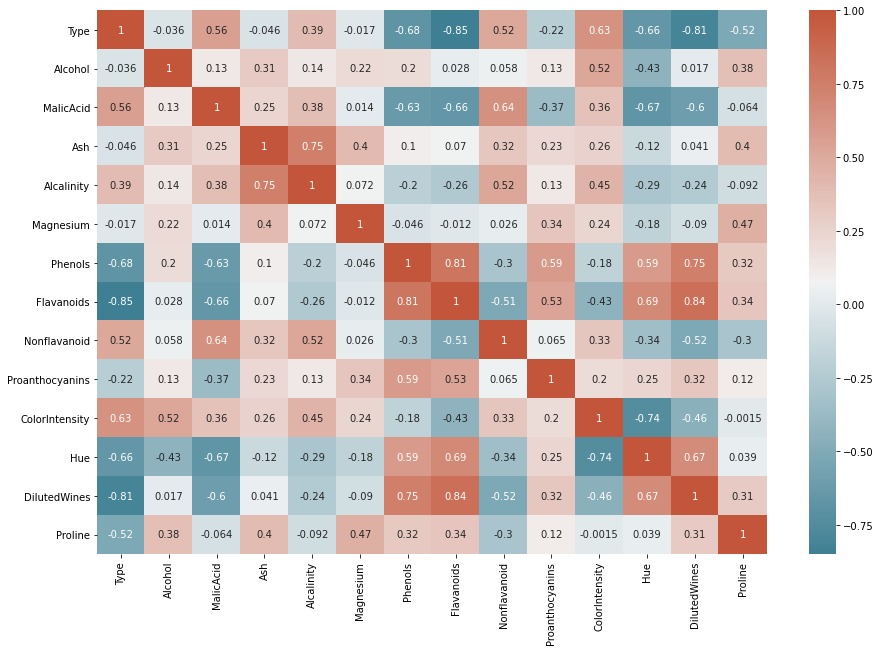

In [16]:
# Create a correlation matrix
corr_matrix = df.corr()
plt.subplots(figsize=(15,10))
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [17]:
# Get the absolute correlation of each column with the target variable 'Type'
correlations = abs(corr_matrix['Type'])

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

Type               1.000000
Flavanoids         0.848733
DilutedWines       0.809671
Phenols            0.681494
Hue                0.660316
ColorIntensity     0.632890
MalicAcid          0.563036
Proline            0.522746
Nonflavanoid       0.515495
Alcalinity         0.392943
Proanthocyanins    0.218893
Ash                0.046456
Alcohol            0.035996
Magnesium          0.016709
Name: Type, dtype: float64


In [18]:
featured_col = ['Flavanoids','DilutedWines','Phenols','Hue','ColorIntensity']
X = df[featured_col]
y = df.Type

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

#Training data points: 20
#Testing data points: 9
Class labels: [1 2 3]


In [20]:
clf = DecisionTreeClassifier(criterion="entropy",min_samples_split=3,splitter='best',max_depth=3,random_state = 0)
#clf = DecisionTreeClassifier(criterion="entropy",splitter='random',max_depth=3,random_state = 0)
# If splitter is random then training accuracy is 0.9
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
#Predict the response for test dataset
y_test_pred = clf.predict(X_test)
import pandas as pd

# assume X_test is your testing data features and y_test is the corresponding labels/targets
test_df = pd.DataFrame(X_test, columns=['Flavanoids','DilutedWines','Phenols','Hue','ColorIntensity'])
test_df['Type'] = y_test

# save the testing data to a CSV file
test_df.to_csv('testing_data.csv', index=False)

#Mean Squared Error
print(mean_squared_error(y_test, y_test_pred))

0.1111111111111111


In [21]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 1.0
Accuracy: 0.8888888888888888


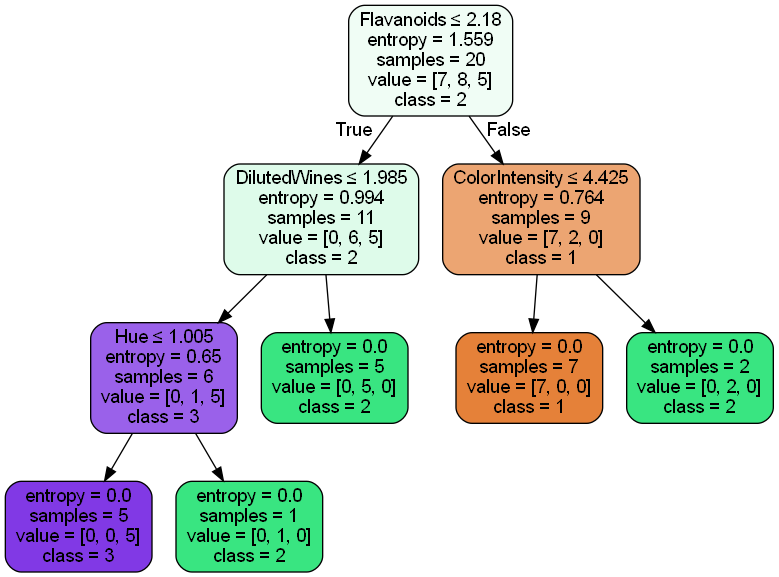

In [22]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featured_col,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Classifier.png')
Image(graph.create_png())